# Exercise 02

In [2]:
import pandas as pd
import sqlite3

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## 1. analyze only the users and not the admins

In [4]:
sql_query = '''
SELECT timestamp
FROM checker
WHERE uid LIKE "user_%"
'''

df = pd.read_sql(sql_query, connection)
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time'] = df['timestamp'].dt.hour
df

,timestamp,time
0,2020-04-17 05:19:02.744528,5
1,2020-04-17 05:22:35.249331,5
2,2020-04-17 05:22:45.549397,5
3,2020-04-17 05:34:14.691200,5
4,2020-04-17 05:34:24.422370,5
...,...,...
3202,2020-05-21 20:19:06.872761,20
3203,2020-05-21 20:22:41.785725,20
3204,2020-05-21 20:22:41.877806,20
3205,2020-05-21 20:37:00.129678,20


In [6]:
bins = [0, 4, 10, 17, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

## 2. night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59

In [7]:
df['daytime'] = pd.cut(df['time'],
                       bins=bins,
                       labels=labels,
                       right=False)
df.drop('time', axis=1, inplace=True)

In [8]:
df['timestamp'] = df['timestamp'].dt.date
df

,timestamp,daytime
0,2020-04-17,morning
1,2020-04-17,morning
2,2020-04-17,morning
3,2020-04-17,morning
4,2020-04-17,morning
...,...,...
3202,2020-05-21,evening
3203,2020-05-21,evening
3204,2020-05-21,evening
3205,2020-05-21,evening


In [33]:
df_daytime = df.pivot_table(index='timestamp', columns='daytime', aggfunc='size', fill_value=0)
df_daytime

/tmp/ipykernel_8833/1634784743.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_daytime = df.pivot_table(index='timestamp', columns='daytime', aggfunc='size', fill_value=0)


daytime,night,morning,afternoon,evening
timestamp,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


## 3. the fontsize and the figsize are still the same
## 4. choose a palette that you really enjoy, you do not have to replicate it from the graphabove

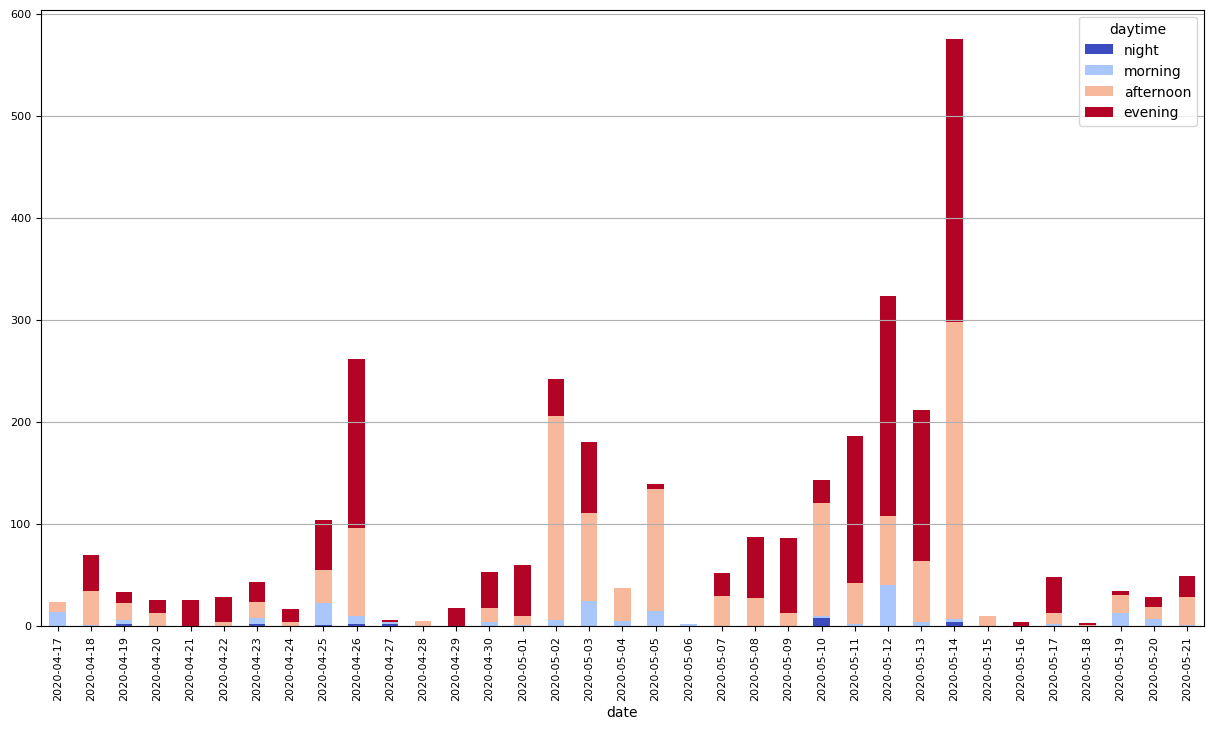

In [84]:
ax = df_daytime.plot.bar(figsize=(15, 8), fontsize=8, stacked=True, xlabel='date', rot=90, colormap='coolwarm')
ax.yaxis.grid()

In [ ]:
connection.close()

## 5. at the end of your Jupyter Notebook, create a markdown cell and insert the ques-tions

- “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.
  - afternoon and evening
- Which day has:
  - he most number of commits
    - 2020-05-14
  - and at the same time, the number of commits in the evening is higher than in the afternoon?
    - the number of commits in the evening is higher than in the afternoon!